# Uniformly Distributed Points on a Sphere

*Randomly generate points on the surface of a sphere, then calculate the variance of its distribution.* 

### Proof

Suppose we have the following uniform spherical distribution $Y$ with a radius of $r = 1$:

\begin{equation*}
Y = \left(Y_1 = \frac{X_1}{\sqrt{X_1^2 + \cdots + X_n^2}}, \cdots, Y_n = \frac{X_n}{\sqrt{X_1^2 + \cdots + X_n^2}} \right)
\end{equation*}

where $X_i$ are iid and follow a standard normal distribution and $n$ is the number of dimensions of a hypersphere (which is the generalization of a 2D circle and 3D sphere to n-dimensions). We're looking for $\text{var}(Y_i) = E[Y_i^2] - E[Y_i]^2$. Similar to the uniform circle problem, we know we're looking for $\text{var}(Y_i) = E[Y_i^2] = \frac{1}{n}E[r^2]$. To solve for $E[r^2]$, we first need the PDF of $r$. The volume of an n-sphere $V_n(r)$ is proportional to $r^n$. So, it's PDF $p_n(r)$ (the surface area of a sphere) is the derivative of that proportionality:

\begin{equation*}
p_n(r) = \frac{dV_n(r)}{dr} \propto nr^{n-1}
\end{equation*}

We can solve for the proportionality constant $k$ by integrating $\int_{0}^{1} k p_n(r)dr = 1$:

\begin{equation*}
\int_{0}^{1} k p_n(r)dr = kn \frac{r^n}{n} \biggr]_0^1 = k = 1
\end{equation*}

Therefore, $p_n(r) = nr^{n-1}$ and we can now solve for $E[r^2]$:

\begin{equation*}
\begin{split}
E[r^2] = \int_{0}^{1}  r^2 nr^{n-1} dr = \frac{n}{n+2}
\end{split}
\end{equation*}

And finally, knowing that $n=1$ for a 3D sphere, we have:

\begin{equation*}
\begin{split}
\boxed{\text{var}(Y_i) = E[Y_i^2] = \frac{1}{n} \left( \frac{n}{n+2} \right) = \frac{1}{3}}
\end{split}
\end{equation*}

### Simulation

The points on the surface of a sphere can be expressed using two spherical coordinates $\theta$ and $\phi$, where $0 \leq \theta \leq 2\pi$ and $0 \leq \phi \leq \pi$. The conversion from spherical to cartesian coordinates is $x = r \text{cos}(\theta) \text{sin}(\phi)$, $y = r \text{sin}(\theta) \text{sin}(\phi)$, and $z = r \text{cos}(\phi)$. Graphical representations of this conversion can be found [here](https://mathinsight.org/spherical_coordinates). 

In order to generate random uniform points $(x, y, z)$, $\theta$ can be multiplied by a random number in the range $[0,1]$. This is similar to what was done for random uniform points $(x, y)$. However, the same can't be done for $\phi$. 

The area of a differential element in spherical coordinates, $dA(d\theta, d\phi) = r^2 \text{sin}(\phi) d\phi d\theta$, is treated like a rectangle of dimension $rd\phi \times r \text{sin}(\phi) d\theta$. When plotted on a 2D rectangle, the points look uniformly distributed. However, when projected onto the surface of a sphere, the poles have a denser distribution of points. This is because, as $\phi \rightarrow 0$ or $\phi \rightarrow \pi$ (i.e. as we near the two poles of the sphere), $\text{sin}(\phi) \rightarrow 0$ and $dA \rightarrow 0$. That means the same number of points are being distributed over a decreasing surface area. 

To ensure uniformity, less points should be distributed near $\phi = 0, \pi$ and more towards $\phi = \frac{\pi}{2}$. To do this, let $v$ be a point on a sphere with $r=1$. Ultimately, we want the PDF of $v$, $f(v)$, to be constant for a uniform distribution. We know that $\int \int f(v)dA = 1$ and $\int \int dA = 4\pi$ for a sphere, so $f(v) = \frac{1}{4\pi}$.To get the corresponding PDF $f(\theta, \phi)$ that maps to a uniform distribution on a sphere, we have:

\begin{equation*}
\begin{split}
f(v) &= \frac{1}{4\pi} \\
\Rightarrow f(v)dA &= \frac{1}{4\pi}dA = f(\theta, \phi) d\theta d\phi \\
\Rightarrow f(\theta, \phi) &= \frac{1}{4 \pi} \text{sin}(\phi)
\end{split}
\end{equation*}

From here, we can get the PDFs of $\theta$ and $\phi$:

\begin{equation*}
\begin{split}
f(\theta) = \int_{0}^{\pi} f(\theta, \phi) d\phi = \frac{1}{2\pi} \\
f(\phi) = \int_{0}^{2\pi} f(\theta, \phi) d\theta = \frac{\text{sin}(\phi)}{2}
\end{split}
\end{equation*}

This confirms what we already knew: $f(\theta)$ is uniformly distributed while $f(\phi)$ is a function of $\text{sin}(\phi)$. In order to ensure we get more points distributed near $\phi = \frac{\pi}{2}$, we need to sample $\phi$ such that it follows the distribution $f(\phi)$. We can do this by using the Inverse Transform Sampling method, which uses random numbers to sample probability distributions. For this, we'll need the CDF of $\phi$:

\begin{equation*}
\begin{split}
F(\phi) &= \int_{0}^{\phi} f(\phi) d\phi = \int_{0}^{\phi} \frac{\text{sin}(\phi)}{2} d\phi \\
&= \frac{1}{2}(1 - \text{cos}(\phi))
\end{split}
\end{equation*}

$F(\phi)$ is a monotonically increasing function from $[0, \pi] \rightarrow [0,1]$ and thus has an inverse. Let $U$ be a random variable in $[0,1]$. Then,

\begin{equation*}
\begin{split}
P(U \leq F(\phi)) &= F(\phi) \\
\Rightarrow P(F^{-1}(U) \leq \phi) &= F(\phi)
\end{split}
\end{equation*}

Therefore, $F^{-1}(U)$ follows the same distribution as $\phi$. In other words, $ \phi = F^{-1}(U) = \text{cos}^{-1}(1-2u)$.

var(x) = 0.32465005915395867


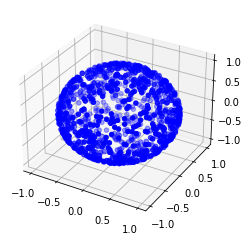

In [1]:
import matplotlib.pyplot as plt
from math import pi, cos, sin, acos
from random import random
from statistics import variance

def get_points_on_sphere(n, r):
    xyz = []
    for _ in range(n):
        theta = random() * 2 * pi
        phi = acos(2*random() - 1)
        xyz.append([r * cos(theta) * sin(phi), r * sin(theta) * sin(phi), r * cos(phi)])
    return xyz

def plot_and_print(n, r, xyz):
    # Calculate var(x)
    x = [point[0] for point in xyz]
    print("var(x) =", variance(x))

    # Plot (x,y,z)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(*zip(*xyz), c = 'b', marker='o')
    plt.show()

n, r = 1000, 1
xyz = get_points_on_sphere(n, r)
plot_and_print(n, r, xyz)

For comparison, this is the non-uniform distribution of points using $\phi = \pi x$, where $x$ is some random number between $[0,1]$. Notice how dense the points are towards the poles and how skewed the variance is.

var(x) = 0.24156657161050005


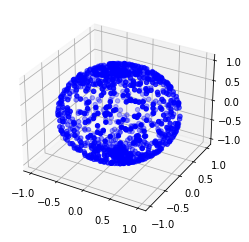

In [2]:
def _get_points_on_sphere(n, r):
    xyz = []
    for _ in range(n):
        theta = random() * 2 * pi
        phi = random() * pi
        xyz.append([r * cos(theta) * sin(phi), r * sin(theta) * sin(phi), r * cos(phi)])
    return xyz

xyz = _get_points_on_sphere(n, r)
plot_and_print(n, r, xyz)